In [ ]:
# Installing dependencies
!pip install easyocr
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Libraries
import cv2 #OpenCV
from matplotlib import pyplot as plt 
import numpy as np
import imutils
import easyocr

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Sample_pics/Cars111.png') #Reading in the image

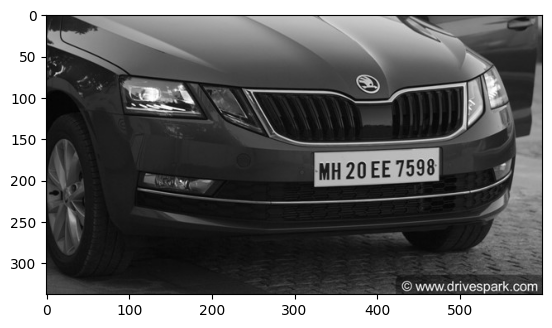

In [ ]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converting the image from BGR to Gray scale 
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB)) #Displaying the gray scale image

In [ ]:
blur_filter = cv2.bilateralFilter(gray_img, 15, 75, 75) #For reduction of Noise
edged_ct = cv2.Canny(blur_filter, 30, 200) #For edge detection

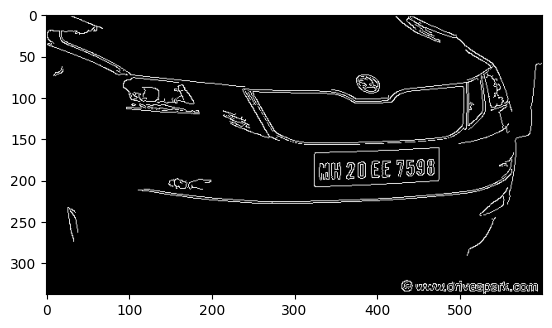

In [ ]:
plt.imshow(cv2.cvtColor(edged_ct, cv2.COLOR_BGR2RGB)) #To display filtered image

In [ ]:
contour_points = cv2.findContours(edged_ct.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #To find contours in the image
contours = imutils.grab_contours(contour_points) 
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10] #sorting the obtained contours

In [ ]:

plate_loc = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #Approximate polygon from the sorted contour list
    if len(approx) == 4:
        plate_loc = approx
        break

In [ ]:
plate_loc

array([[[475, 161]],

       [[325, 167]],

       [[324, 207]],

       [[474, 201]]], dtype=int32)

In [ ]:
#Creating a mask
mask = np.zeros(gray_img.shape, np.uint8)
mask_img = cv2.drawContours(mask, [plate_loc], 0,255, -1)
masked_img = cv2.bitwise_and(img, img, mask=mask) #Returns the segment that has the number plate

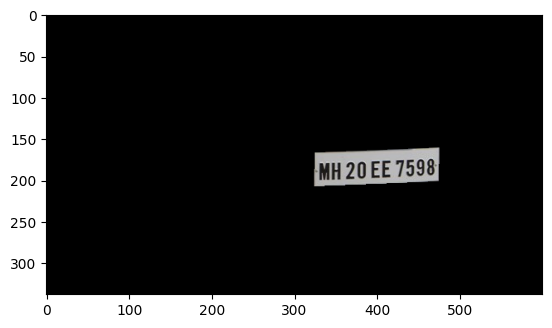

In [ ]:
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))

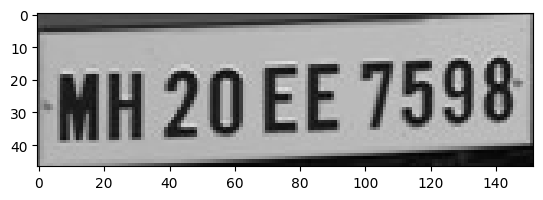

In [ ]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_img = gray_img[x1:x2+1, y1:y2+1] #cropping the image to represent only the number plate
plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)) #displaying the cropped image

In [ ]:
detector = easyocr.Reader(['en'])
result = detector.readtext(cropped_img)
result

[([[1, 9], [152, 9], [152, 47], [1, 47]], 'MH 20EE 7598', 0.9786175712615373)]

In [ ]:
plate_text = result[0][-2]

In [ ]:
import csv

# Opening the csv file and read the content into a dictionary
with open('/content/drive/MyDrive/Num_plate_list.csv', 'r') as file:
    reader = csv.DictReader(file)
    content = {row['Plate']: row for row in reader}

# Check if the plate text is in the content dictionary
if plate_text in content:
    print('Vehicle can pass')
else:
    print('Vehicle cannot pass')

Vehicle can pass


In [ ]:
#The sample images data is from: https://www.kaggle.com/datasets/andrewmvd/car-plate-detection